In [1]:
# import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics, preprocessing
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Pulling in the data [In text citation: Bowne-Anderson, H. (n.d)]
churned_data = pd.read_csv("C:/Users/cfman/OneDrive/Desktop/WGUClasses/D209 Data Mining 1/Task 1/churn_clean.csv")

In [3]:
# Before we get started into the actual cleaning, I want to check for duplicate values in case we need to edit those first
# I am also going to check the shape of the dataframe to verify the rows and columns
# [In text citation: Bowne-Anderson, H. (n.d)]
print(churned_data.shape)


duplicates = churned_data.duplicated(keep = False)
duplicates.value_counts()

(10000, 50)


False    10000
dtype: int64

In [4]:
# I want to check which have missing values here
# [In text citation: Bowne-Anderson, H. (n.d)]
churned_data.isna().sum()
#churned_data.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

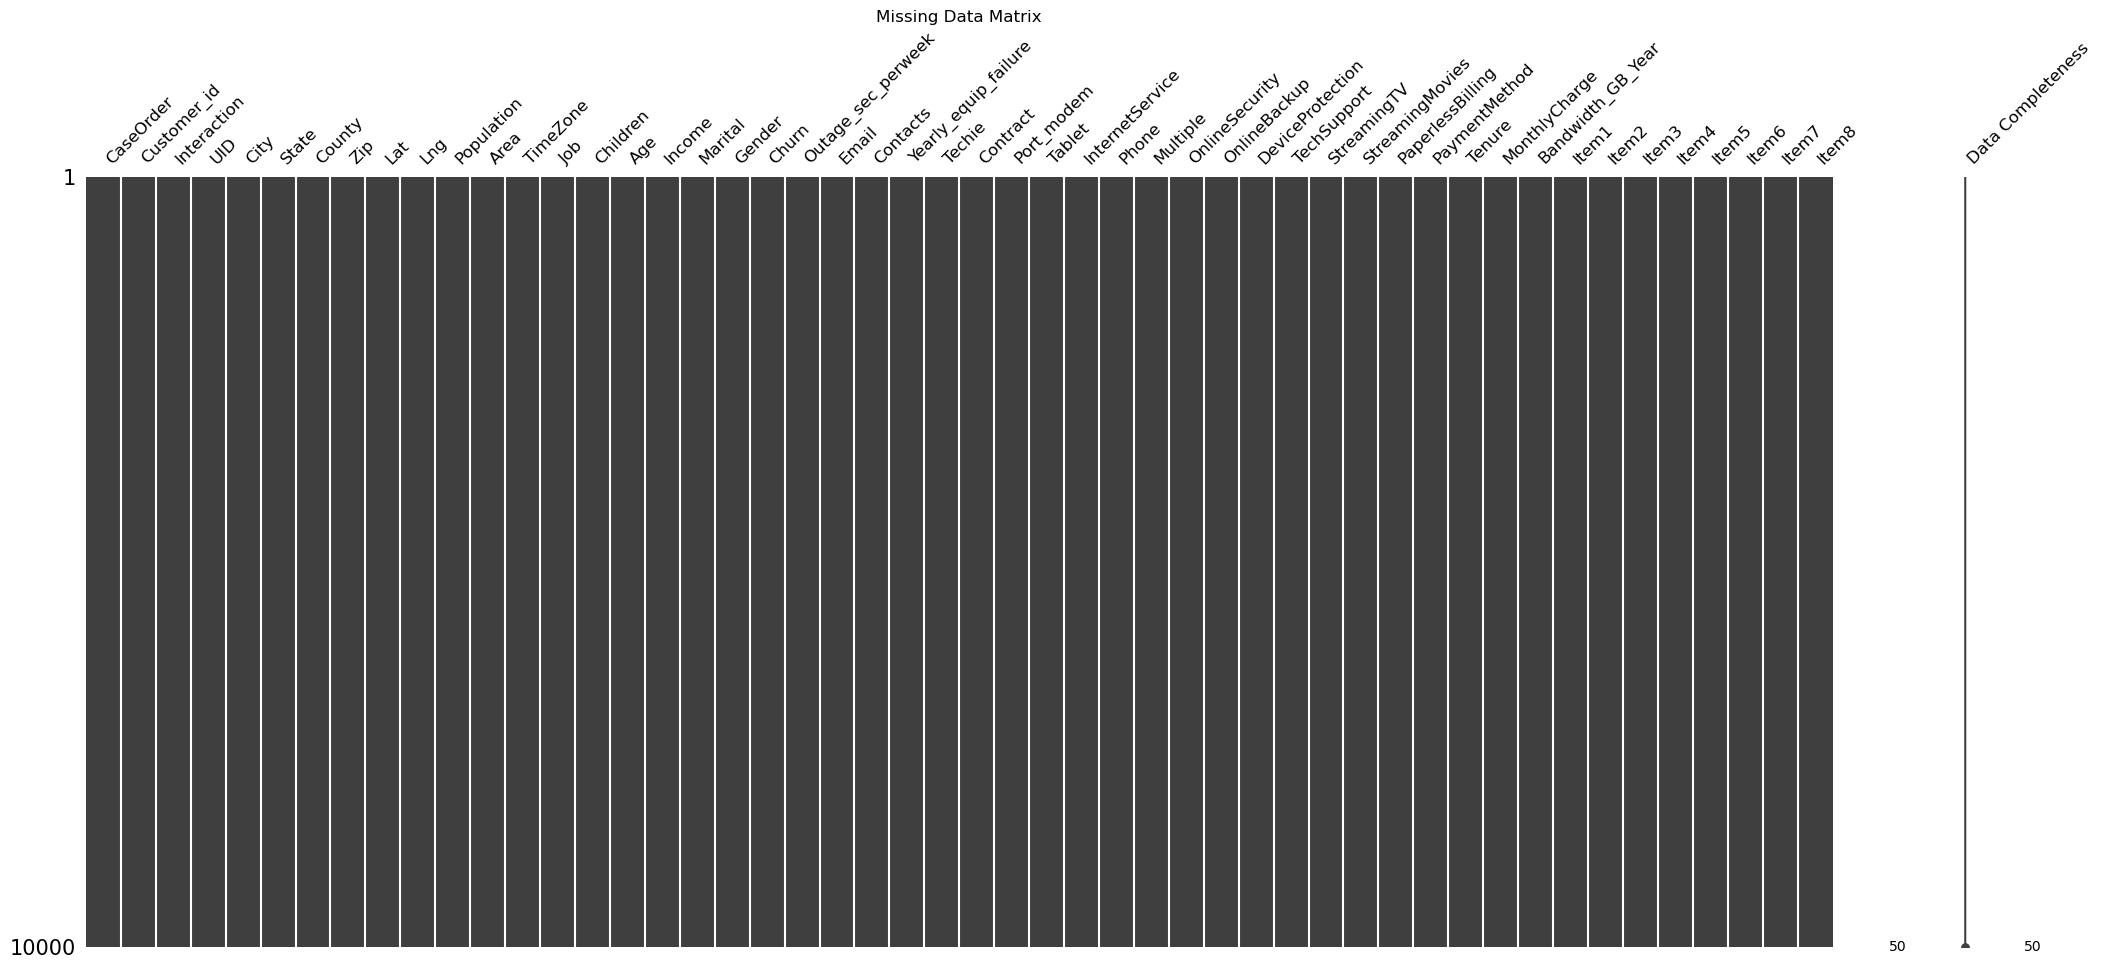

In [5]:
# Visualizing the missing data 
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Cleaning Essentials]
msno.matrix(churned_data, fontsize = 12, labels = True)
plt.title("Missing Data Matrix")
#plt.xlabel(col_names)
plt.show()

In [6]:
## Checking all the quantitative variables for outliers to decide if I need to edit them.

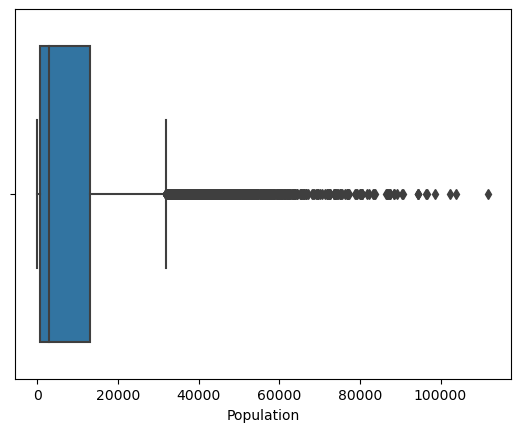

In [7]:
boxplot_population = seaborn.boxplot(x = "Population", data = churned_data)


In [8]:
## Choosing to retain outliers

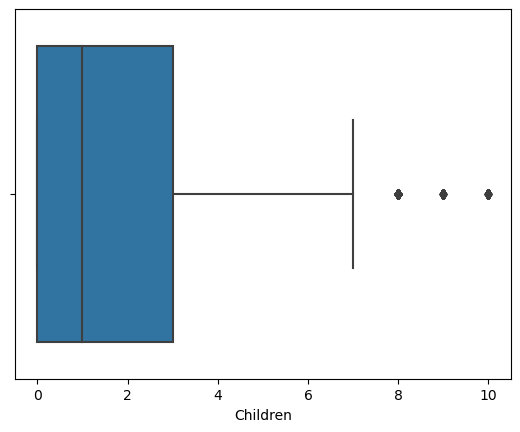

In [9]:
boxplot_Children = seaborn.boxplot(x = "Children", data = churned_data)

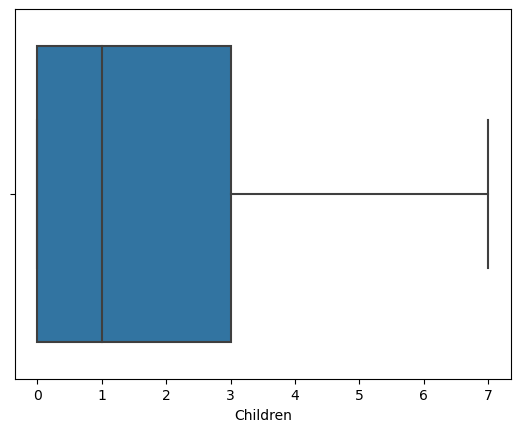

In [10]:
## Removing the  instances outlier and rechecking the plot
Children_outliers = churned_data[ (churned_data["Children"] > 7)]

churned_data.drop(churned_data[ (churned_data["Children"] > 7)].index, inplace = True )
Children_removed_outliers = seaborn.boxplot(x = "Children", data = churned_data)

In [11]:
## No more outliers detected for Children

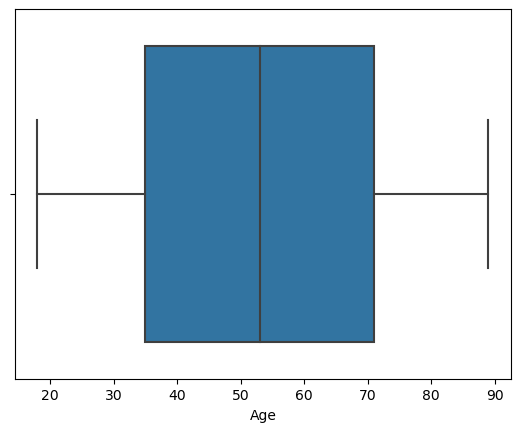

In [12]:
boxplot_Age = seaborn.boxplot(x = "Age", data = churned_data)

In [13]:
## No outliers detected for Age

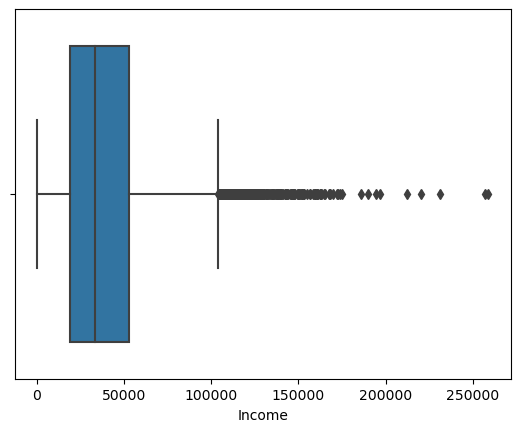

In [14]:
boxplot_Income = seaborn.boxplot(x = "Income", data = churned_data)

19268.980000000003 53141.83
33872.85
-31540.29499999999 103951.105


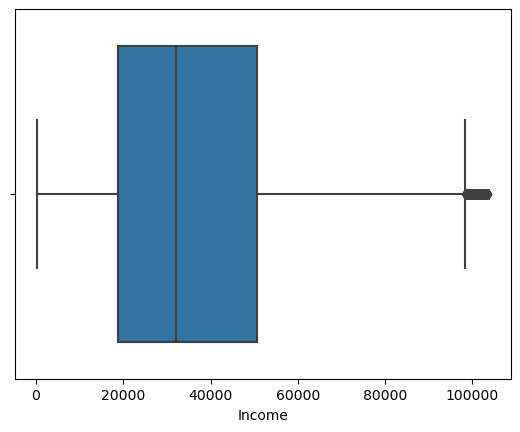

In [15]:
## Re-using my code that I created for D206, I will find the quartile ranges and then drop the necessary values. 

Income_q1, Income_q3 = np.percentile(churned_data["Income"], [25,75])
print(Income_q1, Income_q3)

Income_iqr = Income_q3 - Income_q1
print(Income_iqr)

Income_lower_limit = Income_q1 - (1.5*Income_iqr)
Income_upper_limit = Income_q3 + (1.5*Income_iqr)
print(Income_lower_limit, Income_upper_limit)

## Removing the  instances outlier and rechecking the plot
Income_outliers = churned_data[ (churned_data["Income"] > Income_upper_limit)]
#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Income"] > Income_upper_limit)].index, inplace = True )
Income_removed_outliers = seaborn.boxplot(x = "Income", data = churned_data)

In [16]:
## Going to RETAIN the outliers as there is depreciating returns on the continued reduction of the sample size

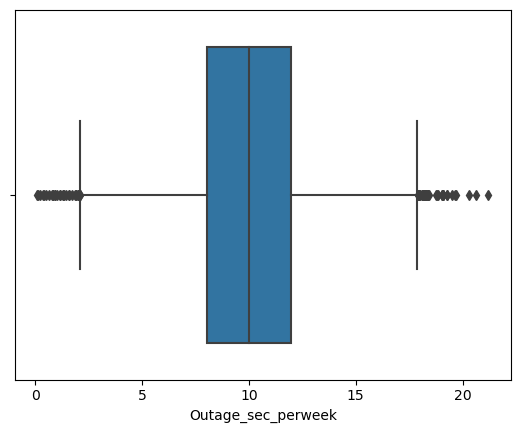

In [17]:
boxplot_Outage = seaborn.boxplot(x = "Outage_sec_perweek", data = churned_data)

8.024894 11.97165632
3.9467623199999995
2.1047505200000005 17.891799799999998


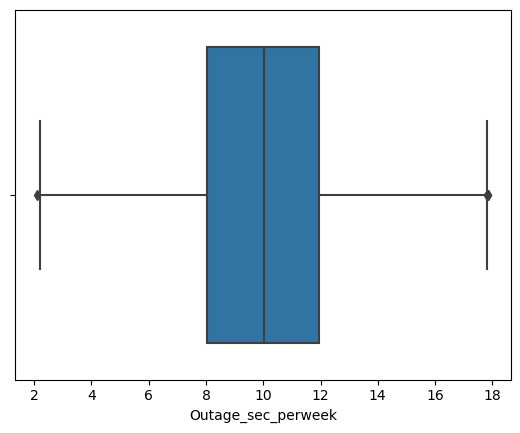

In [18]:
# Also want to check for the interquartile range to know where the value of potential outliers might lie
Outage_q1, Outage_q3 = np.percentile(churned_data["Outage_sec_perweek"], [25,75])
print(Outage_q1, Outage_q3)

Outage_iqr = Outage_q3 - Outage_q1
print(Outage_iqr)

Outage_lower_limit = Outage_q1 - (1.5*Outage_iqr)
Outage_upper_limit = Outage_q3 + (1.5*Outage_iqr)
print(Outage_lower_limit, Outage_upper_limit)

## Removing the values < 0
churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] < 0)].index, inplace = True )

## Removing the  instances outlier and rechecking the plot
Outage_sec_perweek_outliers = churned_data[ (churned_data["Outage_sec_perweek"] > Outage_upper_limit)]
Outage_sec_perweek_outliers.append(churned_data[(churned_data["Outage_sec_perweek"] < Outage_lower_limit)])
#Outage_sec_perweek_outliers.info()

churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] > Outage_upper_limit)].index, inplace = True )
churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] < Outage_lower_limit)].index, inplace = True )

Outage_sec_perweek_removed_outliers = seaborn.boxplot(x = "Outage_sec_perweek", data = churned_data)

In [19]:
## Going to RETAIN the couple of straggling outliers since they are so close to the data

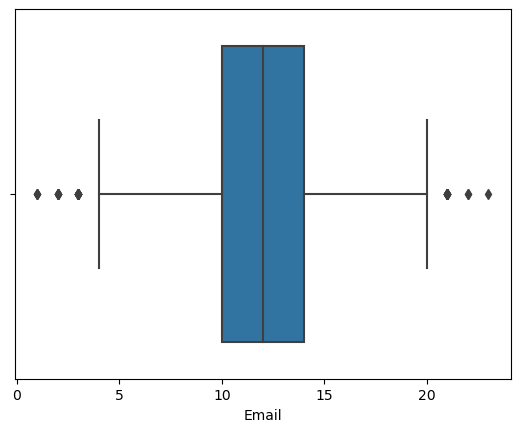

In [20]:
boxplot_Email = seaborn.boxplot(x = "Email", data = churned_data)

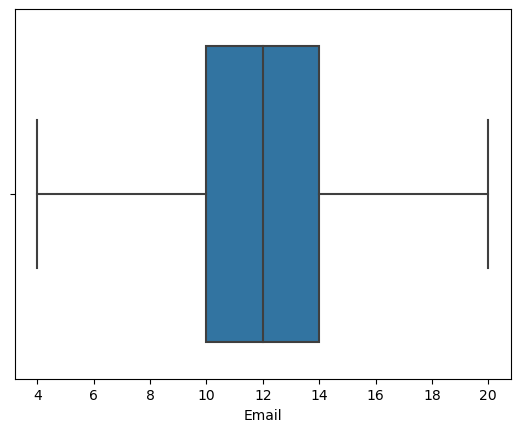

In [21]:
## Removing the  instances outlier and rechecking the plot
Email_outliers = churned_data[ (churned_data["Email"] > 20)]
Email_outliers.append(churned_data[(churned_data["Email"] < 4)])

#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Email"] > 20)].index, inplace = True )
churned_data.drop(churned_data[ (churned_data["Email"] < 4)].index, inplace = True )
Email_removed_outliers = seaborn.boxplot(x = "Email", data = churned_data)

In [22]:
## No more outliers detected for Email

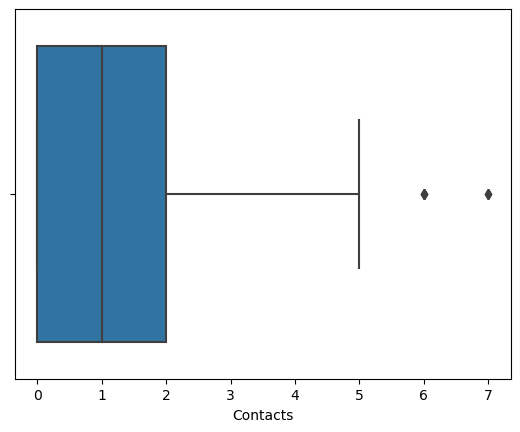

In [23]:
boxplot_Contacts = seaborn.boxplot(x = "Contacts", data = churned_data)

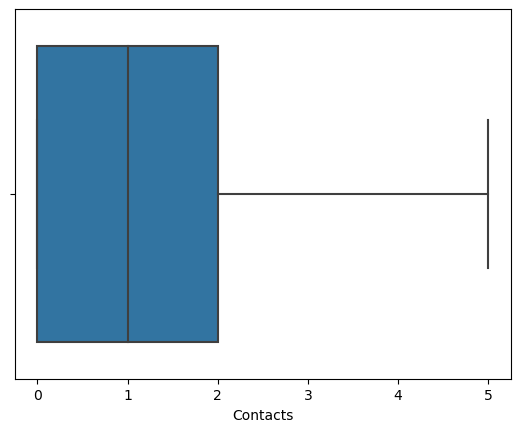

In [24]:
## Removing the  instances outlier and rechecking the plot
Contacts_outliers = churned_data[ (churned_data["Contacts"] > 5)]
#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Contacts"] > 5)].index, inplace = True )
Contacts_removed_outliers = seaborn.boxplot(x = "Contacts", data = churned_data)

In [25]:
## No more outliers detected for Contacts

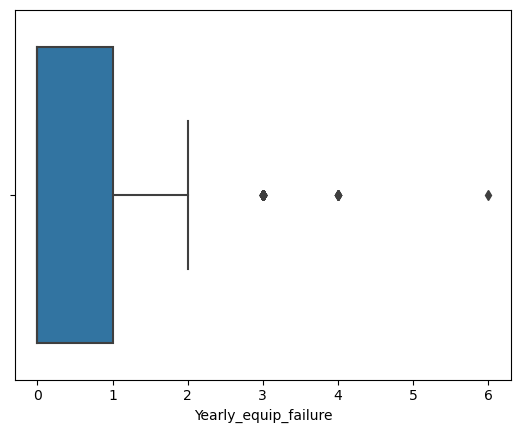

In [26]:
boxplot_Yearly_equip_failure = seaborn.boxplot(x = "Yearly_equip_failure", data = churned_data)

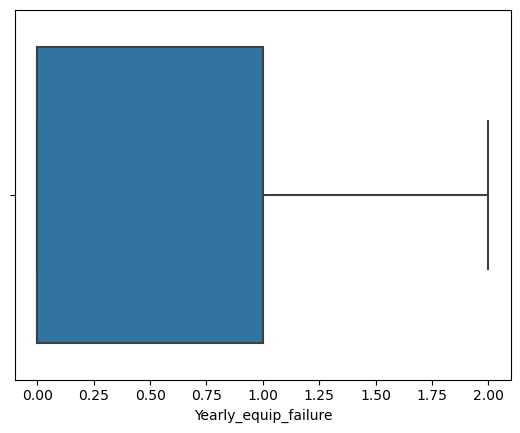

In [27]:
Yearly_equip_failure_outliers = churned_data[ (churned_data["Yearly_equip_failure"] > 2)]
#Yearly_equip_failure_outliers.info()

churned_data.drop(churned_data[ (churned_data["Yearly_equip_failure"] > 2)].index, inplace = True )
Yearly_equip_failure_removed_outliers = seaborn.boxplot(x = "Yearly_equip_failure", data = churned_data)

In [28]:
## No more outliers detected for Yearly_equip_failure

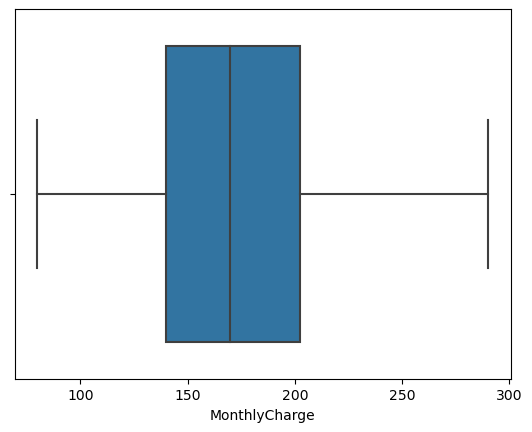

In [29]:
boxplot_MonthlyCharge = seaborn.boxplot(x = "MonthlyCharge", data = churned_data)

In [30]:
## No outliers detected for MonthlyCharge

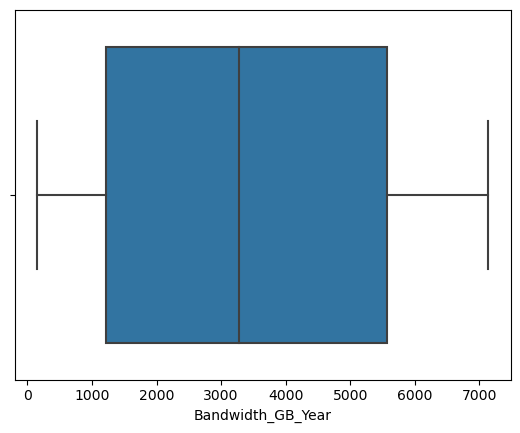

In [31]:
boxplot_Bandwidth_GB_Year = seaborn.boxplot(x = "Bandwidth_GB_Year", data = churned_data)

In [32]:
## No outliers detected for Bandwidth_GB_Year

In [33]:
churned_data.shape

(9079, 50)

In [34]:
## I'm going to create a new dataframe that has just the information and columns that i will use for my analysis.
## I want to use the same variables I used in D208

churned_data_kNN = churned_data.drop(columns = ['Population', 'CaseOrder', 'Customer_id','Interaction', 'UID', 'City', 'State',
                                                'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Marital', 'PaymentMethod',
                                                'Tenure', 'Item1', 'Item2', 'Item3', 'Item4','Item5', 'Item6', 'Item7', 'Item8'])

In [35]:
## Checking the new data set. 
## or to check on a specific customer without any data loss. Should have 18 columns now.
churned_data_kNN.head()

,Area,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharge,Bandwidth_GB_Year
0,Urban,0,68,28561.99,Male,No,7.978323,10,0,1,...,No,Yes,Yes,No,No,No,Yes,Yes,172.455519,904.536110
1,Urban,1,27,21704.77,Female,Yes,11.699080,12,0,1,...,Yes,Yes,No,No,No,Yes,Yes,Yes,242.632554,800.982766
2,Urban,4,50,9609.57,Female,No,10.752800,9,0,1,...,Yes,No,No,No,No,No,Yes,Yes,159.947583,2054.706961
3,Suburban,1,48,18925.23,Male,No,14.913540,15,2,0,...,No,Yes,No,No,No,Yes,No,Yes,119.956840,2164.579412
4,Suburban,0,83,40074.19,Male,Yes,8.147417,16,2,1,...,No,No,No,No,Yes,Yes,No,No,149.948316,271.493436


In [36]:
## Getting a list of all of the columns names except for the CaseOrder and Customer_id

churned_cont =['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts', 'Email', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']
churned_cat = ['Churn','Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
churned_misc = ['Area', 'Gender', 'InternetService', 'Contract']

In [37]:
## Getting the summary statistics for each categorical variable

for i in range (0, len(churned_cat)):
    count, unique, top, freq = churned_data_kNN[churned_cat[i]].describe()
    first, second = churned_data_kNN[churned_cat[i]].value_counts()
    print("Descriptive statistics for ", churned_cat[i], '\n', churned_data_kNN[churned_cat[i]].value_counts(), '\n')
    print("The overall proportion of responses is ", round((first/count)*100, 2),"%", top, '\n')
    


Descriptive statistics for  Churn 
 No     6666
Yes    2413
Name: Churn, dtype: int64 

The overall proportion of responses is  73.42 % No 

Descriptive statistics for  Techie 
 No     7563
Yes    1516
Name: Techie, dtype: int64 

The overall proportion of responses is  83.3 % No 

Descriptive statistics for  Port_modem 
 No     4688
Yes    4391
Name: Port_modem, dtype: int64 

The overall proportion of responses is  51.64 % No 

Descriptive statistics for  Tablet 
 No     6370
Yes    2709
Name: Tablet, dtype: int64 

The overall proportion of responses is  70.16 % No 

Descriptive statistics for  Phone 
 Yes    8237
No      842
Name: Phone, dtype: int64 

The overall proportion of responses is  90.73 % Yes 

Descriptive statistics for  Multiple 
 No     4881
Yes    4198
Name: Multiple, dtype: int64 

The overall proportion of responses is  53.76 % No 

Descriptive statistics for  OnlineSecurity 
 No     5830
Yes    3249
Name: OnlineSecurity, dtype: int64 

The overall proportion of re

In [38]:
for i in range(0, len(churned_misc)):
    a, b, c = churned_data_kNN[churned_misc[i]].unique()
    count, unique, top, freq = churned_data_kNN[churned_misc[i]].describe()
    first, second, third = churned_data_kNN[churned_misc[i]].value_counts()
    print("Descriptive statistics for ", churned_misc[i], '\n', churned_data_kNN[churned_misc[i]].value_counts(), '\n')
    print("The overall proportion of responses is ", round((first/count)*100, 2),"%", a, '\n')
    print("The overall proportion of responses is ", round((second/count)*100, 2),"%", b, '\n')
    print("The overall proportion of responses is ", round((third/count)*100, 2),"%", c, '\n')

Descriptive statistics for  Area 
 Suburban    3043
Urban       3023
Rural       3013
Name: Area, dtype: int64 

The overall proportion of responses is  33.52 % Urban 

The overall proportion of responses is  33.3 % Suburban 

The overall proportion of responses is  33.19 % Rural 

Descriptive statistics for  Gender 
 Female       4570
Male         4298
Nonbinary     211
Name: Gender, dtype: int64 

The overall proportion of responses is  50.34 % Male 

The overall proportion of responses is  47.34 % Female 

The overall proportion of responses is  2.32 % Nonbinary 

Descriptive statistics for  InternetService 
 Fiber Optic    4013
DSL            3134
None           1932
Name: InternetService, dtype: int64 

The overall proportion of responses is  44.2 % Fiber Optic 

The overall proportion of responses is  34.52 % DSL 

The overall proportion of responses is  21.28 % None 

Descriptive statistics for  Contract 
 Month-to-month    4956
Two Year          2232
One year          1891
Name

In [39]:
#print(stop)

In [40]:
## Getting the summary statistics for each continuous variable

for i in range (0, len(churned_cont)):
    print("Descriptive statistics for ", churned_cont[i], '\n', churned_data_kNN[churned_cont[i]].describe(), '\n')
    


Descriptive statistics for  Children 
 count    9079.000000
mean        1.810992
std         1.695791
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         7.000000
Name: Children, dtype: float64 

Descriptive statistics for  Age 
 count    9079.000000
mean       53.210376
std        20.668749
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64 

Descriptive statistics for  Income 
 count      9079.000000
mean      36742.304085
std       22857.868877
min         348.670000
25%       18843.450000
50%       32125.500000
75%       50558.085000
max      103625.100000
Name: Income, dtype: float64 

Descriptive statistics for  Outage_sec_perweek 
 count    9079.000000
mean       10.003606
std         2.874367
min         2.110607
25%         8.049125
50%        10.024230
75%        11.952450
max        17.861530
Name: Outage_sec_perweek, dtype: float64 

Descriptive statis

In [41]:
#print(Fail)

In [42]:
print(churned_data_kNN.columns.tolist())

['Area', 'Children', 'Age', 'Income', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharge', 'Bandwidth_GB_Year']


In [43]:
## Dr. Elleh video lecture 'D209 T1 Building KNN in Python Med'
for i in range(0, len(churned_misc)):
    a, b, c = churned_data_kNN[churned_misc[i]].unique()
    churned_data_kNN[churned_misc[i]] = churned_data_kNN[churned_misc[i]].str.replace(' ', '')
    encoded = pd.get_dummies(churned_data_kNN[churned_misc[i]], prefix = churned_misc[i])
    frames = [churned_data_kNN, encoded]
    churned_data_kNN = pd.concat(frames, axis = 1)
    churned_data_kNN = churned_data_kNN.drop([churned_misc[i]], axis = 1)
churned_data_kNN.head()

,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,...,Area_Urban,Gender_Female,Gender_Male,Gender_Nonbinary,InternetService_DSL,InternetService_FiberOptic,InternetService_None,Contract_Month-to-month,Contract_Oneyear,Contract_TwoYear
0,0,68,28561.99,No,7.978323,10,0,1,No,Yes,...,1,0,1,0,0,1,0,0,1,0
1,1,27,21704.77,Yes,11.699080,12,0,1,Yes,No,...,1,1,0,0,0,1,0,1,0,0
2,4,50,9609.57,No,10.752800,9,0,1,Yes,Yes,...,1,1,0,0,1,0,0,0,0,1
3,1,48,18925.23,No,14.913540,15,2,0,Yes,No,...,0,0,1,0,1,0,0,0,0,1
4,0,83,40074.19,Yes,8.147417,16,2,1,No,Yes,...,0,0,1,0,0,1,0,1,0,0


In [44]:
## Replacing all Yes/No responses with an int value corresponding to Yes = 1 and No = 0.
## Per my code from D206

churned_data_kNN = churned_data_kNN.replace({"Yes": 1, "No": 0})
#churned_data_kNN.head()

In [45]:
churned_data_norm  = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(churned_data_kNN), columns=churned_data_kNN.columns)
churned_data_norm

,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,...,Area_Urban,Gender_Female,Gender_Male,Gender_Nonbinary,InternetService_DSL,InternetService_FiberOptic,InternetService_None,Contract_Month-to-month,Contract_Oneyear,Contract_TwoYear
0,0.000000,0.704225,0.273183,0.0,0.372532,0.3750,0.0,0.5,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.142857,0.126761,0.206786,1.0,0.608756,0.5000,0.0,0.5,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.571429,0.450704,0.089671,0.0,0.548679,0.3125,0.0,0.5,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.142857,0.422535,0.179872,0.0,0.812837,0.6875,0.4,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.915493,0.384652,1.0,0.383267,0.7500,0.4,0.5,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,0.428571,0.070423,0.536183,0.0,0.463803,0.5000,0.4,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9075,0.571429,0.422535,0.327090,0.0,0.293947,0.6875,0.4,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9076,0.142857,0.422535,0.441870,0.0,0.284447,0.3750,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9077,0.142857,0.295775,0.158012,0.0,0.632427,0.6250,0.2,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [46]:
churned_data_norm.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D209 Data Mining 1/Task 1/churn_data_norm.csv')
#print(churned_data_kNN.shape)

In [47]:
## From https://campus.datacamp.com/courses/intermediate-regression-with-statsmodels-in-python/multiple-logistic-regression-4?ex=3
## https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.predict.html#statsmodels.discrete.discrete_model.Logit.predict-parameters

explanatory = churned_data_norm.drop(['Churn'], axis = 1)
target = churned_data_norm['Churn']

explanatory_train,explanatory_test,target_train,target_test = train_test_split(explanatory,target,test_size=0.3,random_state=1, stratify = target) 

explanatory_train.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D209 Data Mining 1/Task 1/explanatory_train.csv')
explanatory_test.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D209 Data Mining 1/Task 1/explanatory_test.csv')
target_train.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D209 Data Mining 1/Task 1/target_train.csv')
target_test.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D209 Data Mining 1/Task 1/target_test.csv')


In [48]:
## Dr. Elleh's video lecture 'D209 Webinar Splitting Data and Creating Model'
# Determining the best K-value
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(5,155,10), 'metric': ('manhattan', 'euclidean', 'minkowski'), 
              'weights' : ('uniform', 'distance')}

# Defining parameter range
grid = GridSearchCV(knn, param_grid, cv = 10)

# Fitting the model for grid search
grid_search = grid.fit(explanatory_train, target_train)

print('The best parameters are: ', grid_search.best_params_)
print('The best score is: ', grid_search.best_score_)

The best parameters are:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
The best score is:  0.8265926311097905


In [49]:
nan_count = np.count_nonzero(np.isnan(explanatory_test.values))
print(nan_count)
# Output: 2

0


[0. 0. 0. ... 0. 0. 0.]


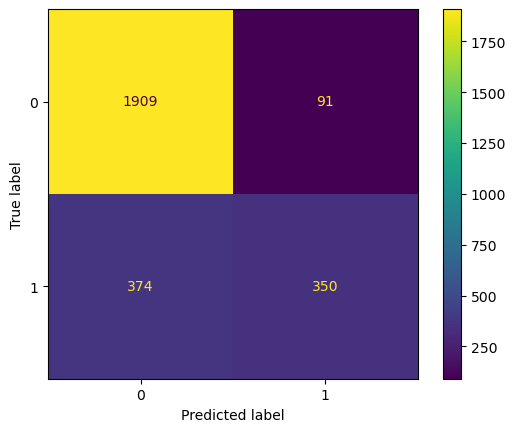

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      2000
         1.0       0.79      0.48      0.60       724

    accuracy                           0.83      2724
   macro avg       0.81      0.72      0.75      2724
weighted avg       0.82      0.83      0.81      2724



In [54]:
knn = KNeighborsClassifier(n_neighbors = 15, metric = 'manhattan', weights = 'distance')
knn.fit(explanatory_train, target_train)
y_pred = knn.predict(explanatory_test.values)
print(y_pred)
## Accuracy tests
cnf_matrix = metrics.confusion_matrix(target_test, y_pred)
disp = ConfusionMatrixDisplay(cnf_matrix)
disp.plot()
plt.show()
print(classification_report(target_test, y_pred))

In [58]:
df = pd.DataFrame(y_pred)
df.to_csv('C:/Users/cfman/OneDrive/Desktop/df.csv')

In [51]:
# Performance Metrics
total = cnf_matrix[0,0] + cnf_matrix[1,0] + cnf_matrix[0,1] + cnf_matrix[1,1]
accuracy = (cnf_matrix[0,0] + cnf_matrix[1,1]) / total
print('Accuracy: ', accuracy)

sensitivity = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0])
print('Sensitivity: ', sensitivity)

specificity = cnf_matrix[0,0] / (cnf_matrix[0,0] + cnf_matrix[0,1])
print('Specificity: ', specificity)

Accuracy:  0.8043318649045521
Sensitivity:  0.5041436464088398
Specificity:  0.913


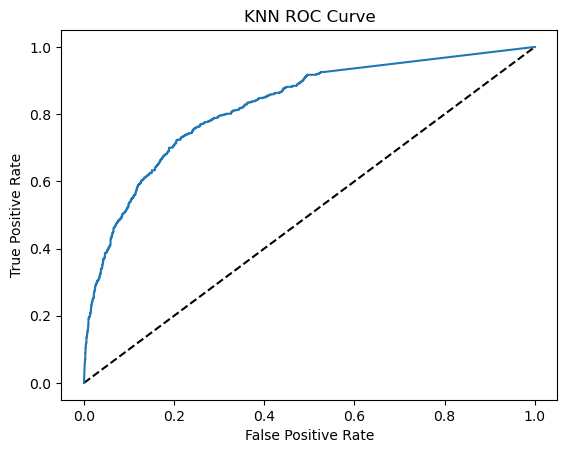

In [52]:
## Initial ROC Curve
probs = knn.predict_proba(explanatory_test.values)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, probs)

plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label = 'KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

In [53]:
## Initial AUC
auc = roc_auc_score(target_test, probs)
print("AUC: ", auc)

AUC:  0.8250441988950277
